In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [23]:
df= pd.read_csv("Medical_insurance.csv")

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [25]:
df.shape 

(2772, 7)

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [28]:
df.describe()  

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8060\970331768.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

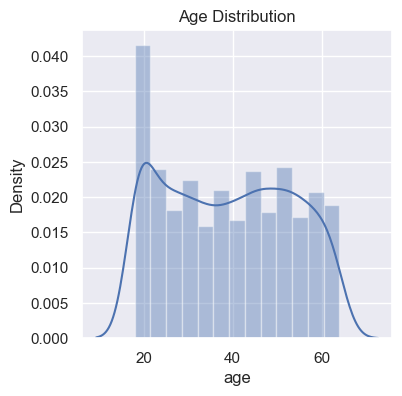

In [30]:
#distribution of age values
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show

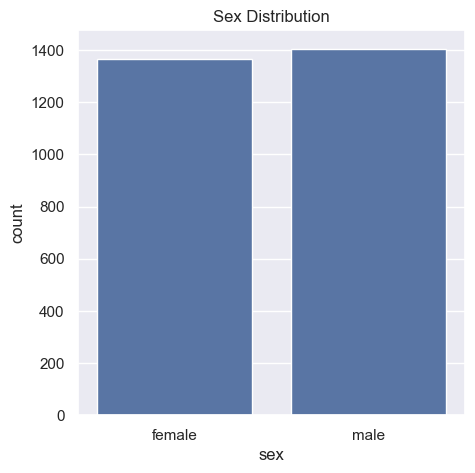

In [31]:
#for sex column
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data= df)
plt.title('Sex Distribution')
plt.show()

In [32]:
df['sex'].value_counts() 

sex
male      1406
female    1366
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8060\2174357568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


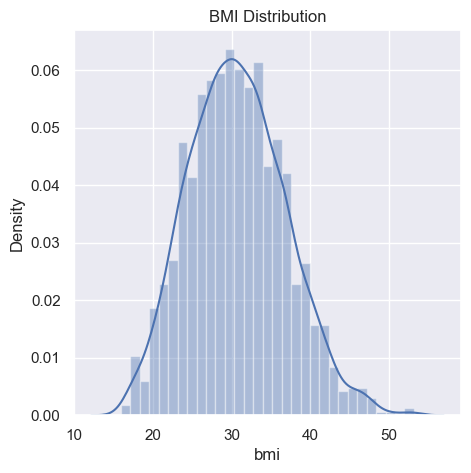

In [33]:
#for BMI column
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

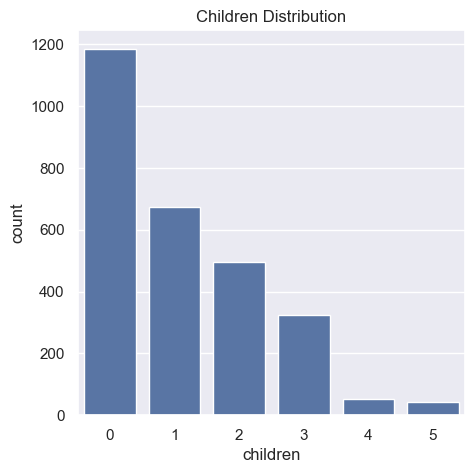

In [34]:
#Children column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show() 

In [35]:
df['children'].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

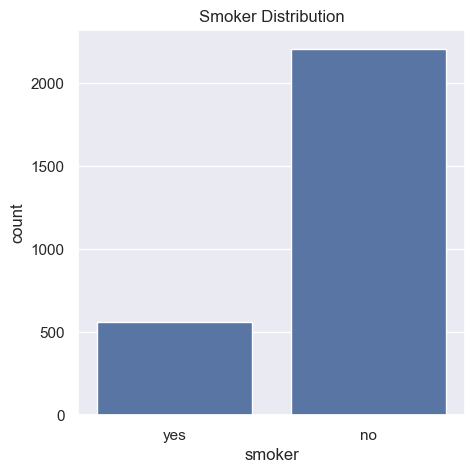

In [36]:
#smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data= df)
plt.title('Smoker Distribution')
plt.show()  

In [37]:
df['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

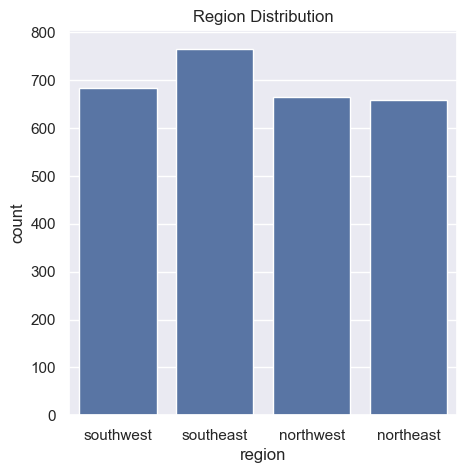

In [38]:
#region column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data= df)
plt.title('Region Distribution')
plt.show()  

In [39]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8060\1278674707.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<function matplotlib.pyplot.show(close=None, block=None)>

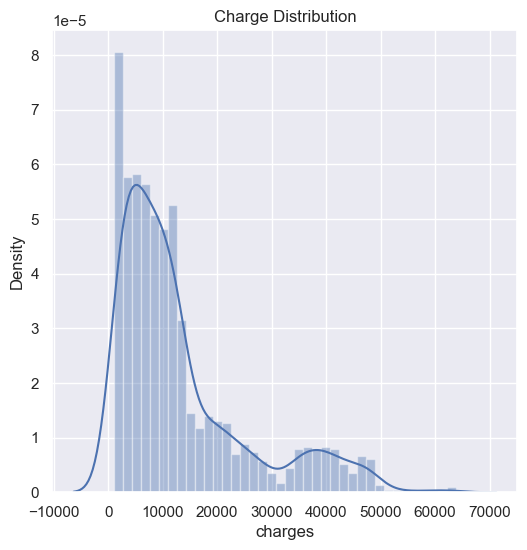

In [40]:
#distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show

This distribution is right-skewed. To make it closer to normal we can apply natural log

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8060\3050198714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


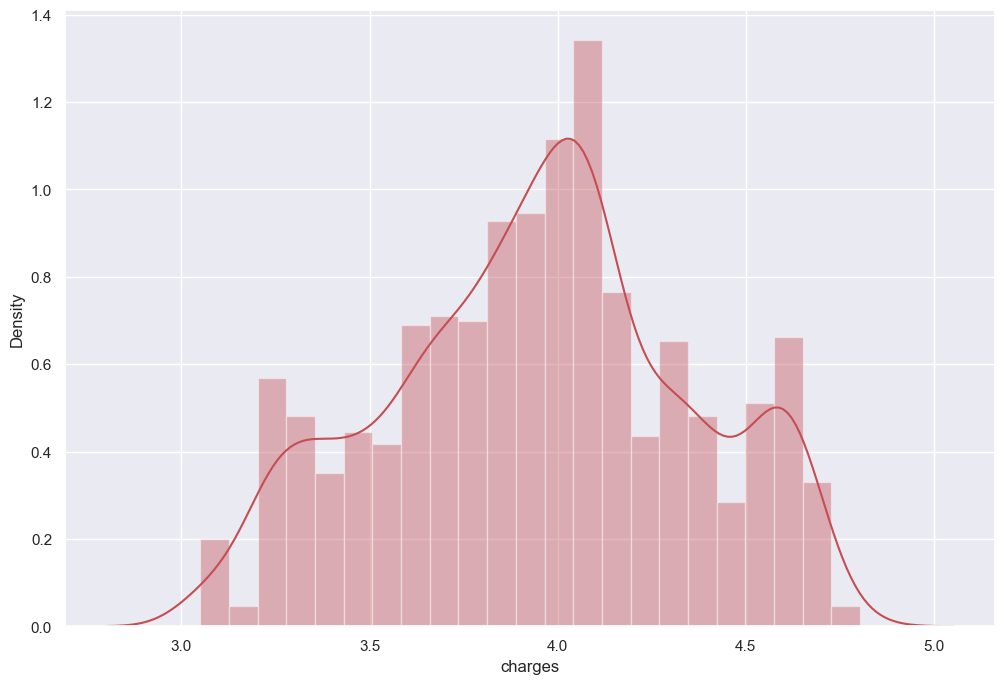

In [41]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

In [42]:
#encoding sex column
df.replace({'sex':{'male':0, 'female':1}},inplace= True)
#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}},inplace= True)
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace= True)

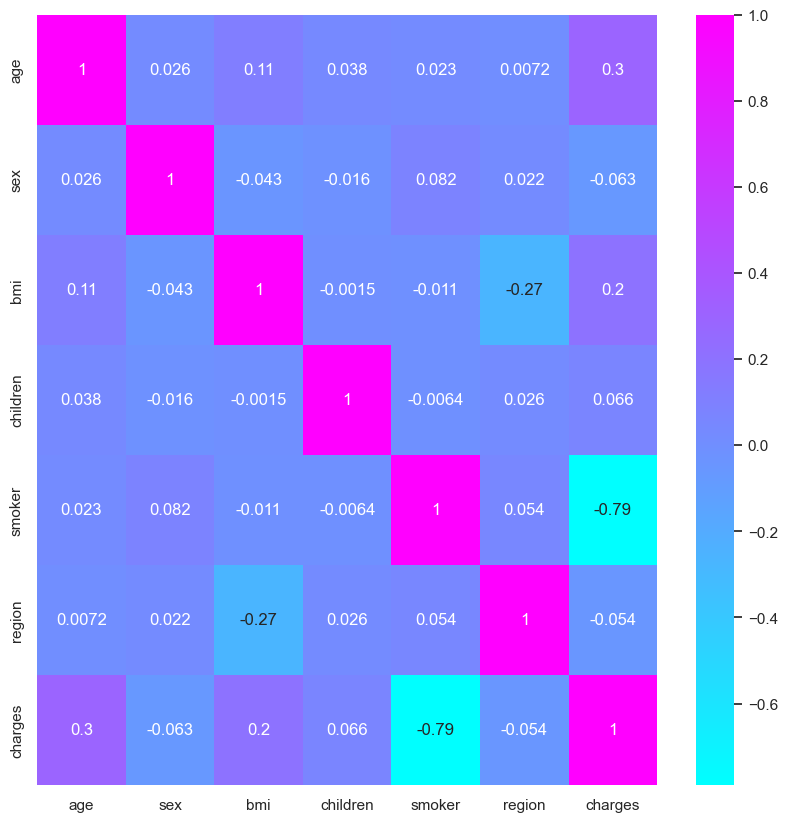

In [43]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<function matplotlib.pyplot.show(close=None, block=None)>

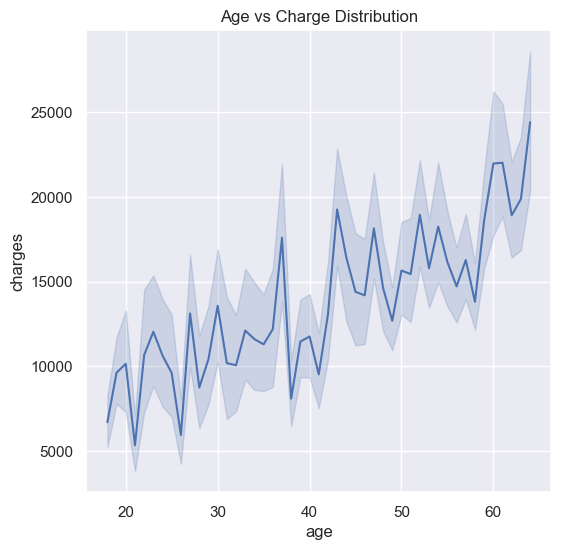

In [44]:
#Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='charges',data= df)
plt.title('Age vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

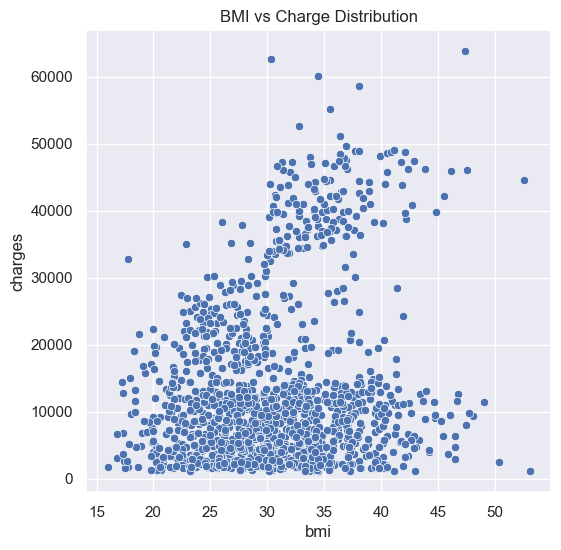

In [45]:
#Scatterplot for BMI and Charges
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='charges',data= df)
plt.title('BMI vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

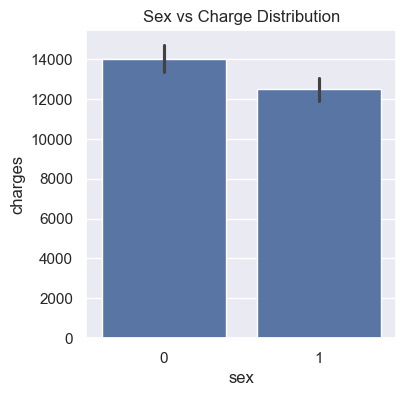

In [46]:
#Scatterplot for Sex and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='charges',data= df)
plt.title('Sex vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

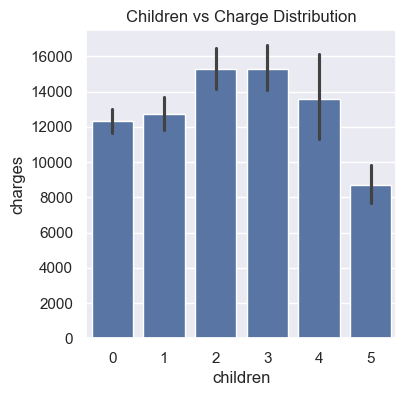

In [47]:
#Scatterplot for Children and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='charges',data= df)
plt.title('Children vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

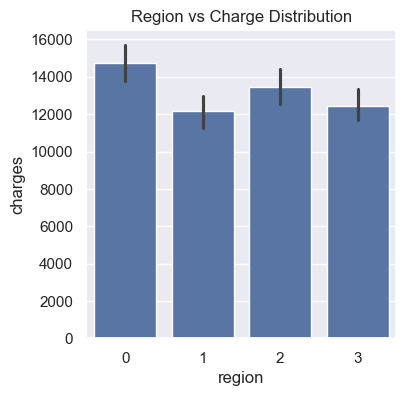

In [48]:
#Scatterplot for Region and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='region',y='charges',data= df)
plt.title('Region vs Charge Distribution')
plt.show

In [50]:
# Assuming the target variable is 'target' and features are the rest
features = df.drop(columns='charges')
features_with_const = add_constant(features)

# Add constant term to the feature set
features_with_const = add_constant(features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = features_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(features_with_const.values, i) for i in range(features_with_const.shape[1])]

print(vif_data)

    feature        VIF
0     const  43.035686
1       age   1.017350
2       sex   1.009795
3       bmi   1.096895
4  children   1.002427
5    smoker   1.010110
6    region   1.084692


In [52]:
X= df.drop(columns= 'charges',axis= 1)
y= df['charges']
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size =0.8,test_size=0.2, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(2772, 6) (2217, 6) (555, 6)
